# **Installing Necessary Files**

In [ ]:
%pip install streamlit

In [ ]:
%pip install pyngrok

# **Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pickle
import streamlit as st
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
d=pd.read_csv('/content/drive/MyDrive/Dissertation Dataset(DBS)/Crop_recommendation.csv')
d

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df = d.copy()

# **Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
duplicates = int(df.duplicated().sum())
print('Duplicates:',duplicates)

Duplicates: 0


In [ ]:
class_counts = df['label'].value_counts()
print(class_counts)

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


# Count Plot of Crop Labels

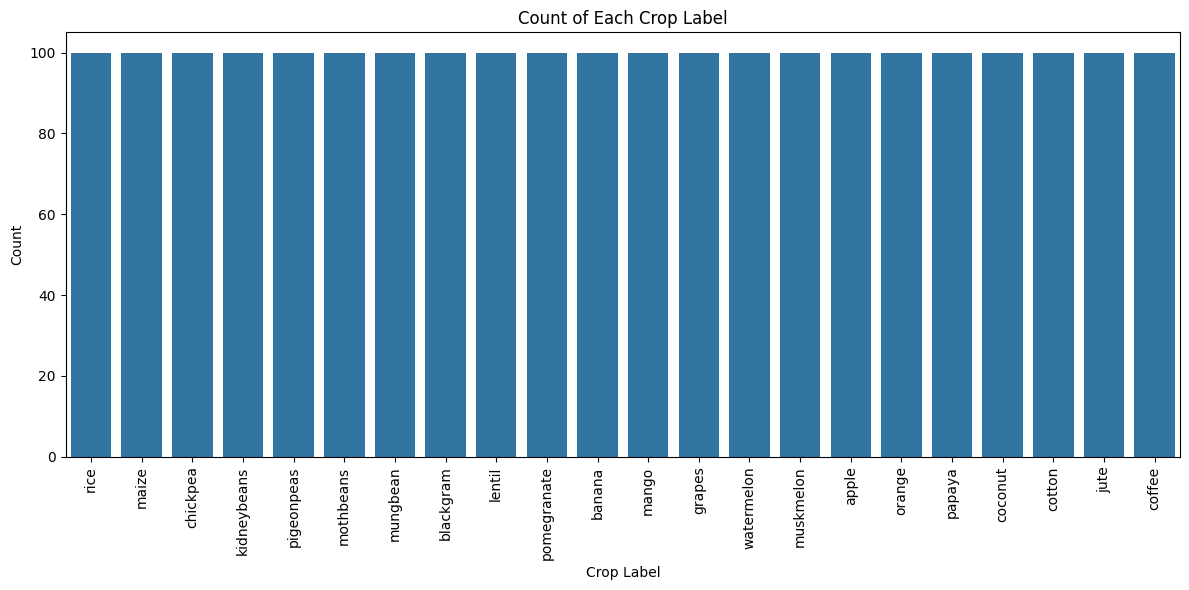

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label')
plt.title('Count of Each Crop Label')
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Descriptive Statistics

In [ ]:
display(df.describe())

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Box Plot

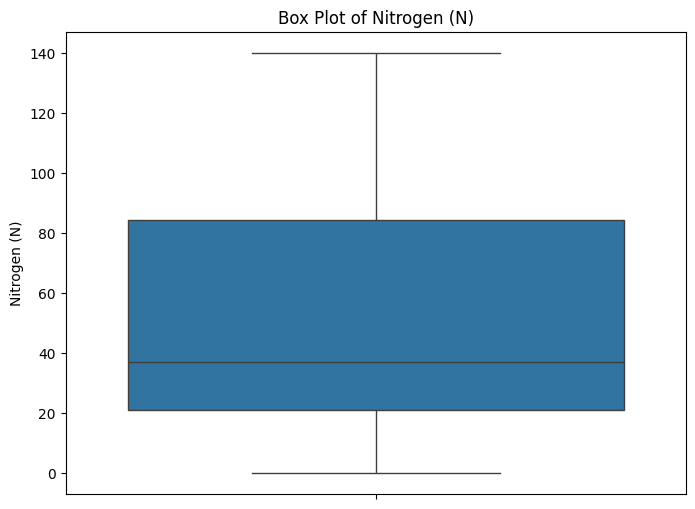

In [ ]:
# Nitrogen
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='N')
plt.title('Box Plot of Nitrogen (N)')
plt.ylabel('Nitrogen (N)')
plt.show()

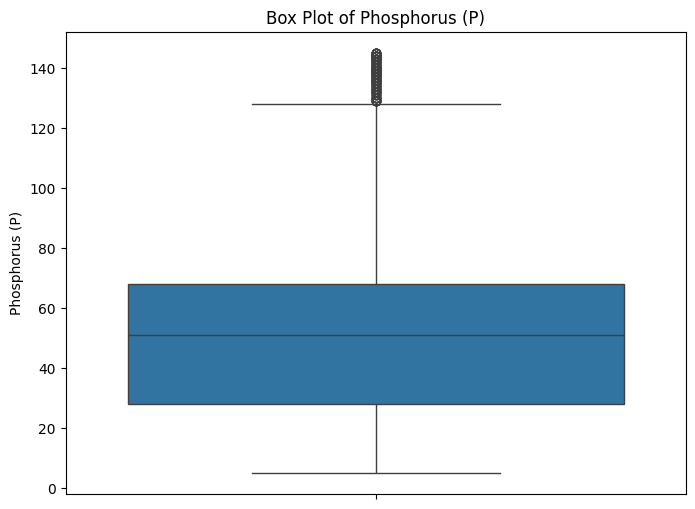

In [ ]:
# Phosphorus
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='P')
plt.title('Box Plot of Phosphorus (P)')
plt.ylabel('Phosphorus (P)')
plt.show()

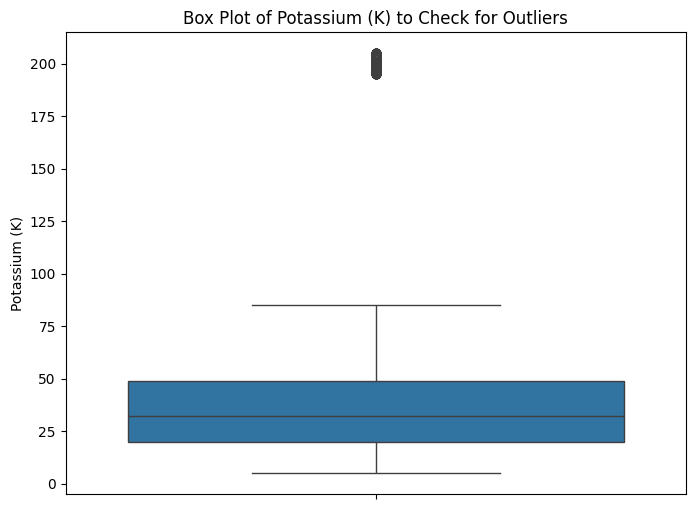

In [ ]:
# Potassium
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='K')
plt.title('Box Plot of Potassium (K) to Check for Outliers')
plt.ylabel('Potassium (K)')
plt.show()

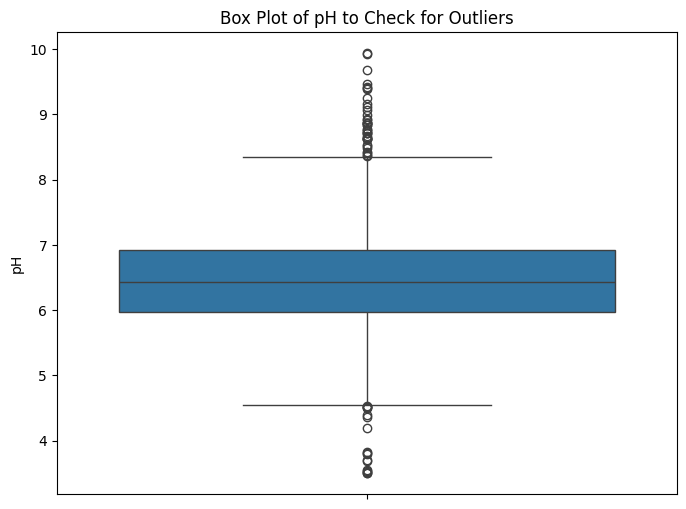

In [ ]:
# pH
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='ph')
plt.title('Box Plot of pH to Check for Outliers')
plt.ylabel('pH')
plt.show()

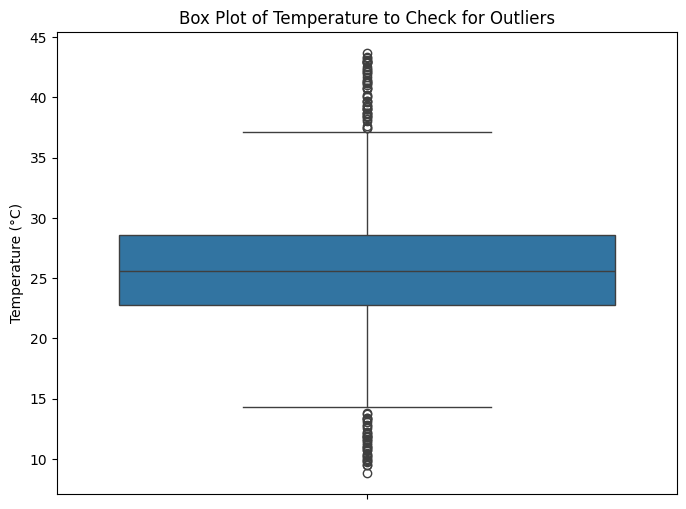

In [ ]:
# Temperature
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='temperature')
plt.title('Box Plot of Temperature to Check for Outliers')
plt.ylabel('Temperature (°C)')
plt.show()

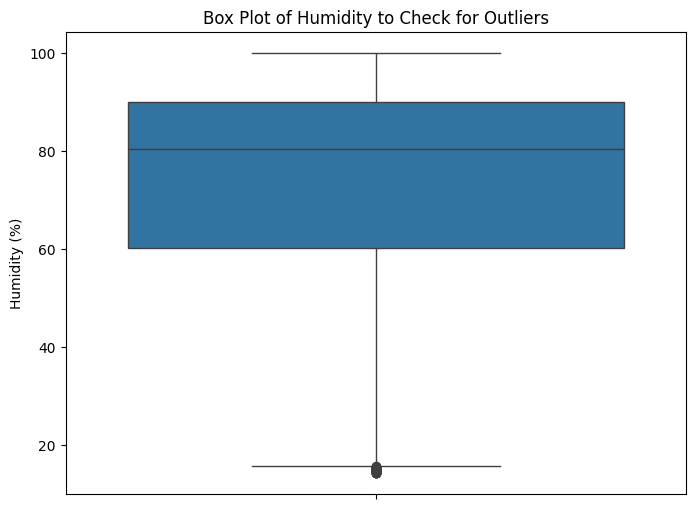

In [ ]:
# Humidity
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='humidity')
plt.title('Box Plot of Humidity to Check for Outliers')
plt.ylabel('Humidity (%)')
plt.show()

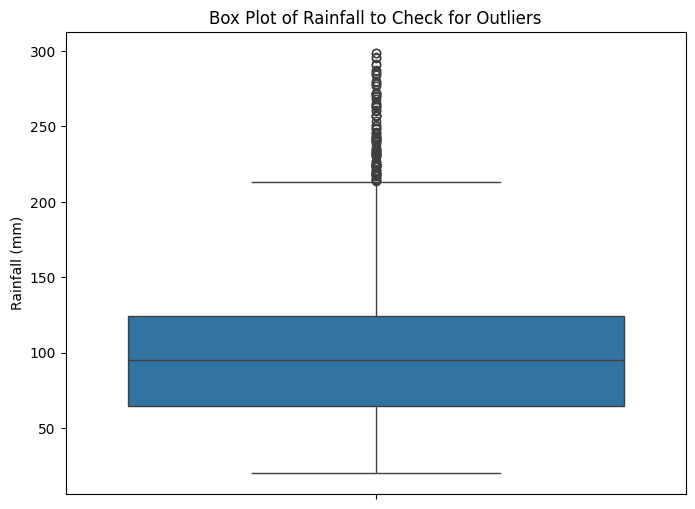

In [ ]:
# Rainfall
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='rainfall')
plt.title('Box Plot of Rainfall to Check for Outliers')
plt.ylabel('Rainfall (mm)')
plt.show()

# Correlation Matrix

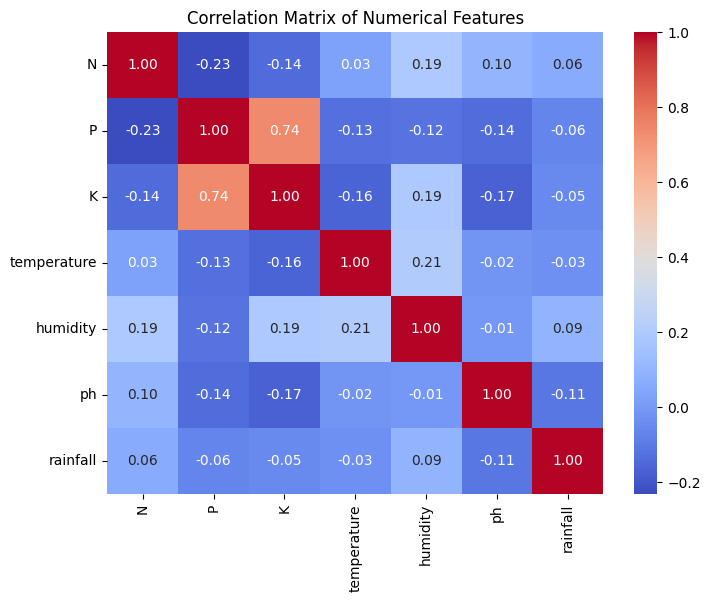

In [ ]:
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Top 3 Correlated Pairs

In [ ]:
sorted_correlations = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
top_correlated_pairs = sorted_correlations[sorted_correlations != 1.0].drop_duplicates()
print("Top correlated numerical feature pairs:")
num_top_pairs = 3
print(top_correlated_pairs.head(num_top_pairs))

Top correlated numerical feature pairs:
P         K              0.736232
humidity  temperature    0.205320
K         humidity       0.190859
dtype: float64


# Box Plots Of Numerical Features Against The Label

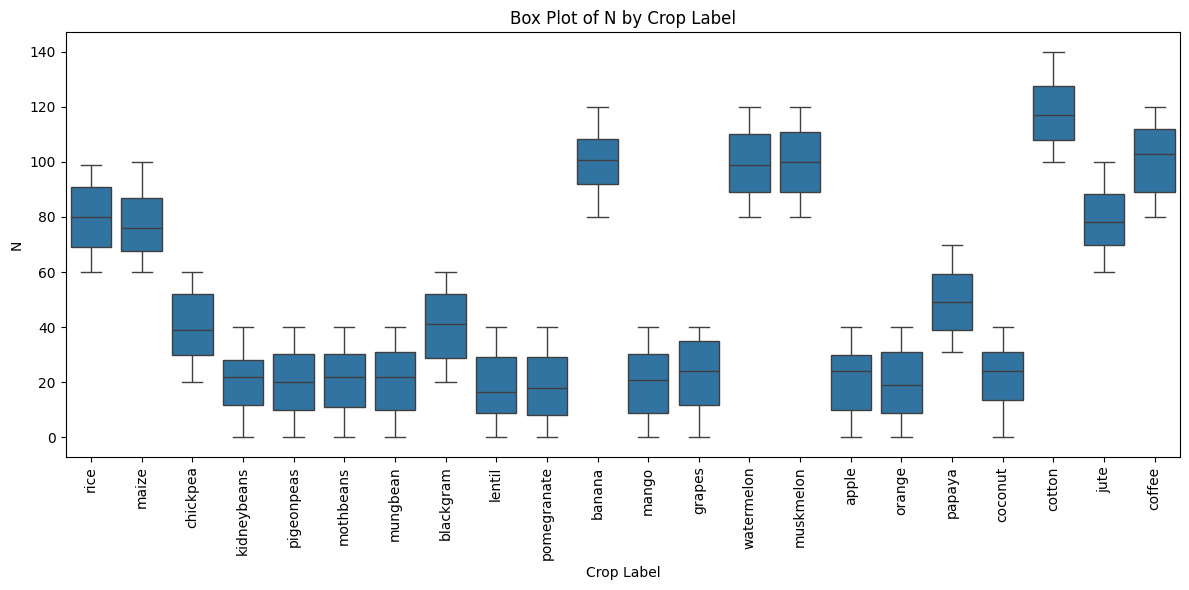

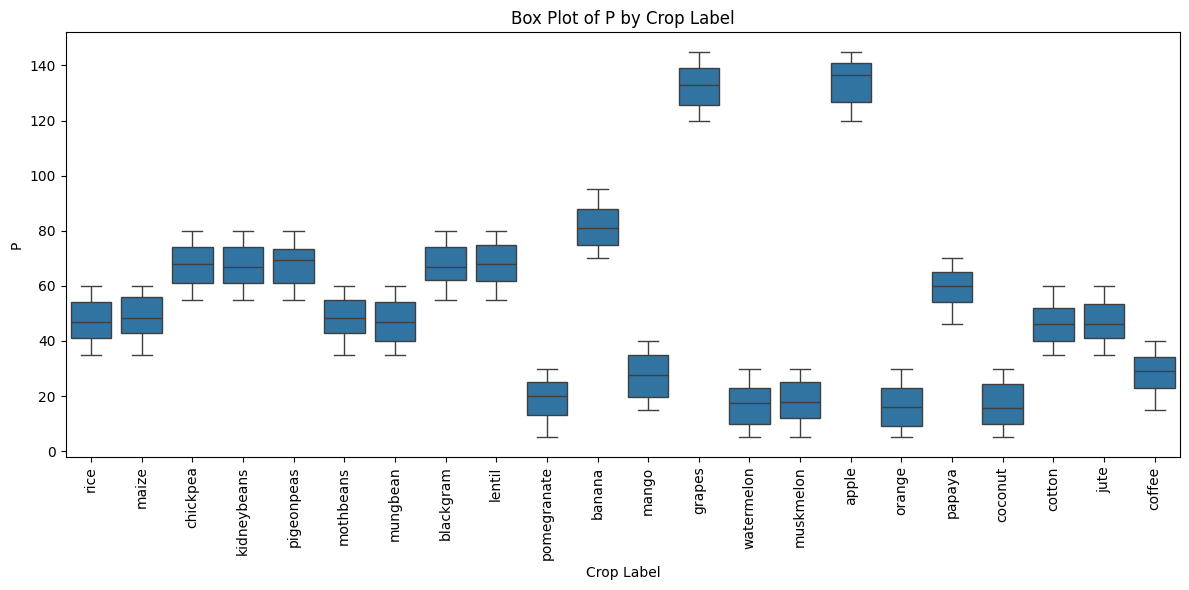

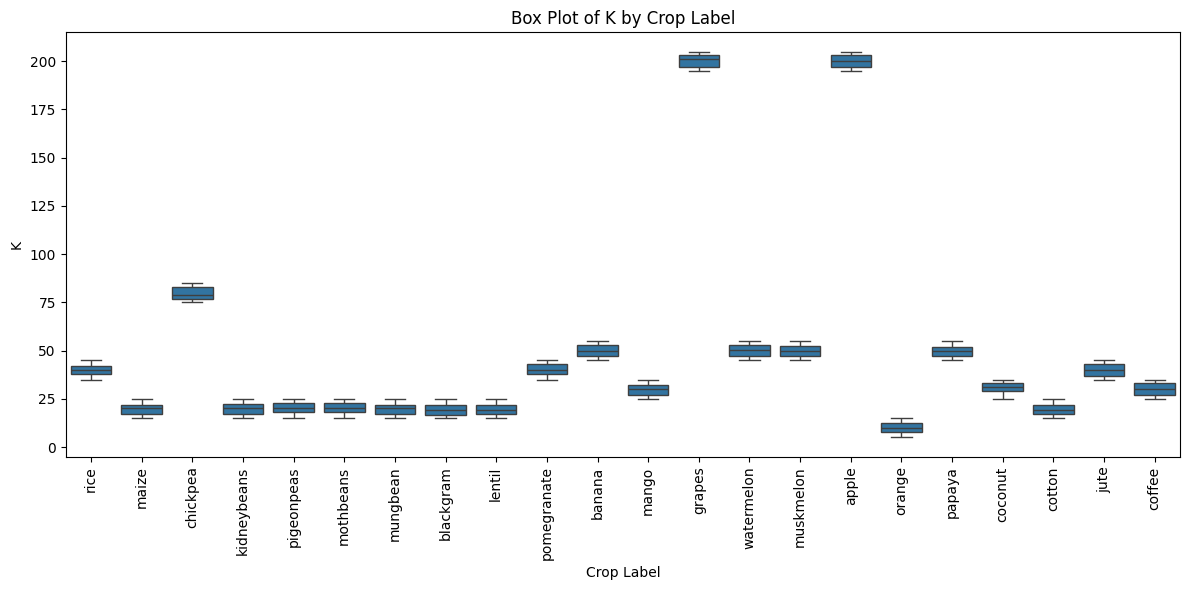

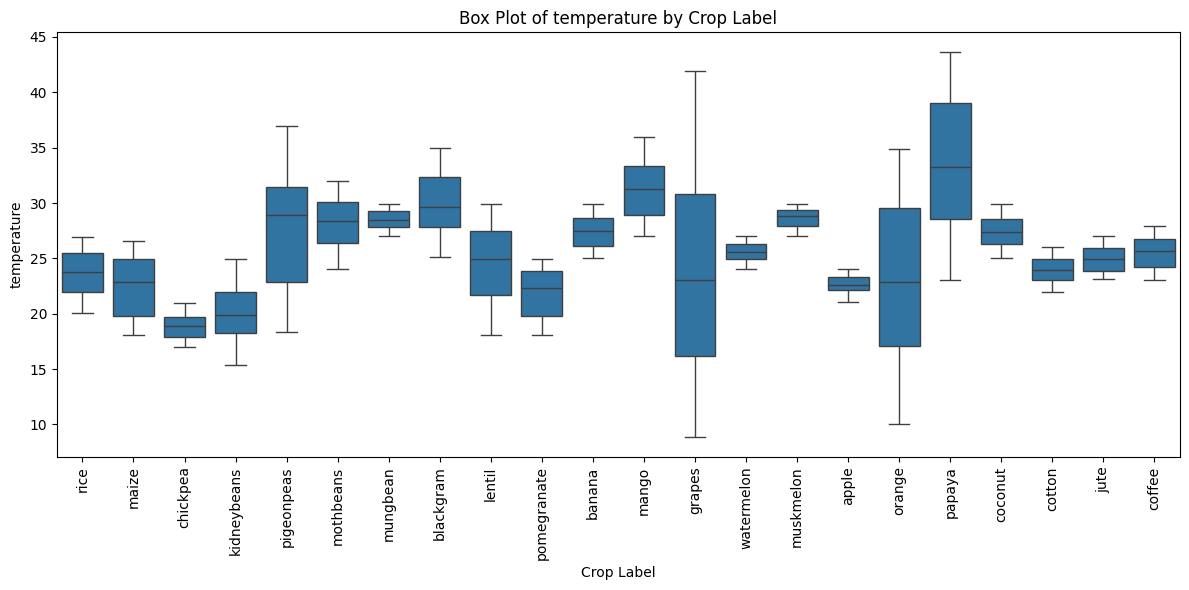

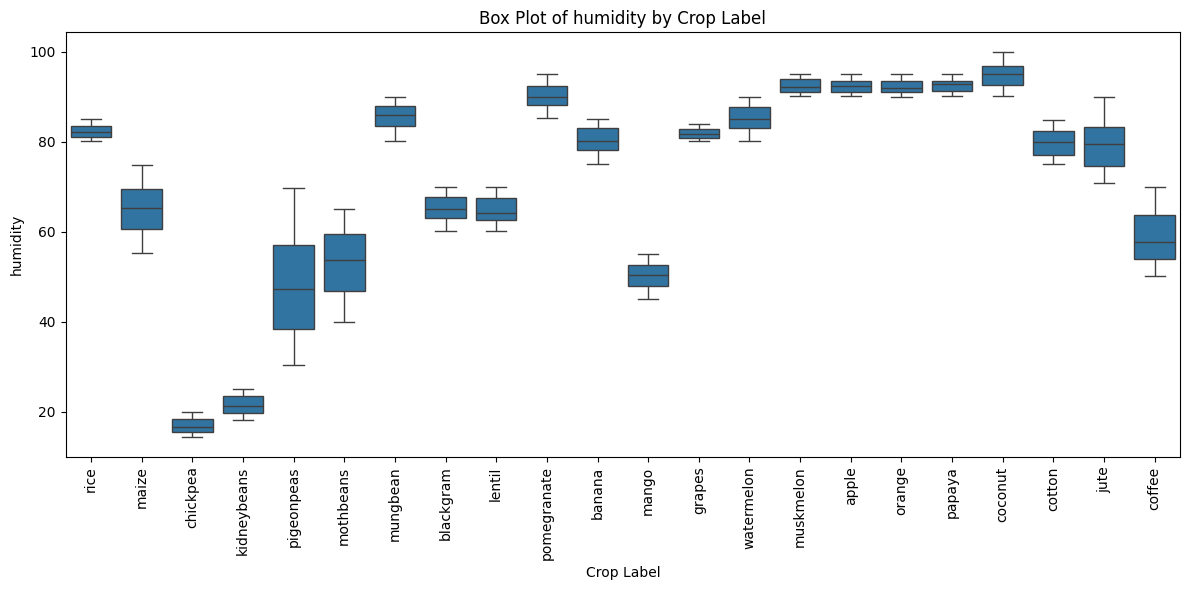

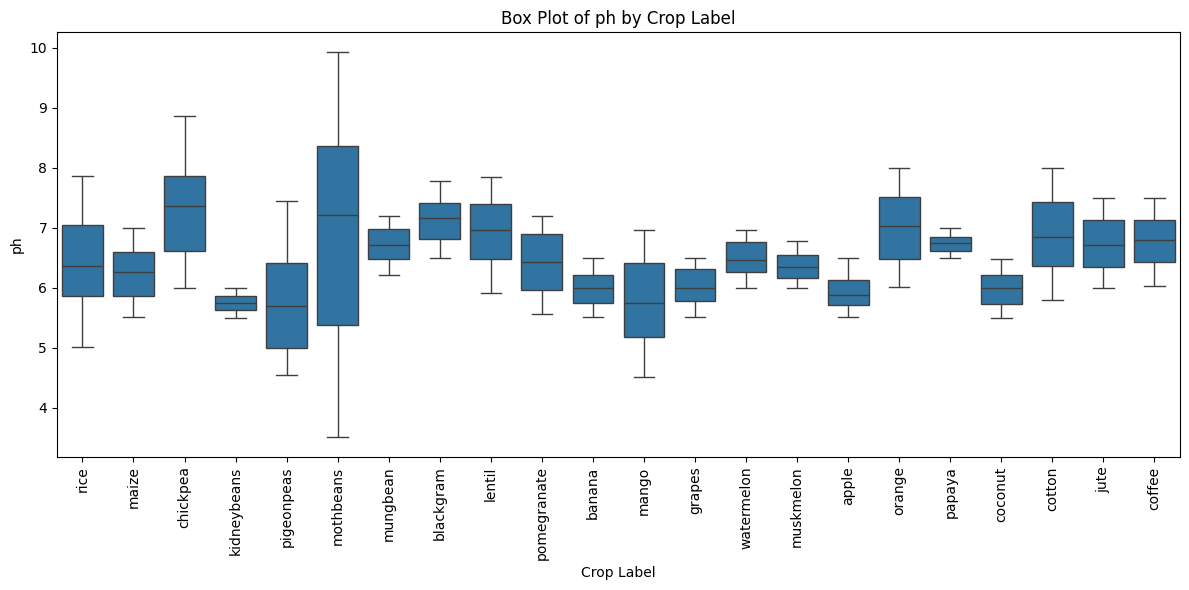

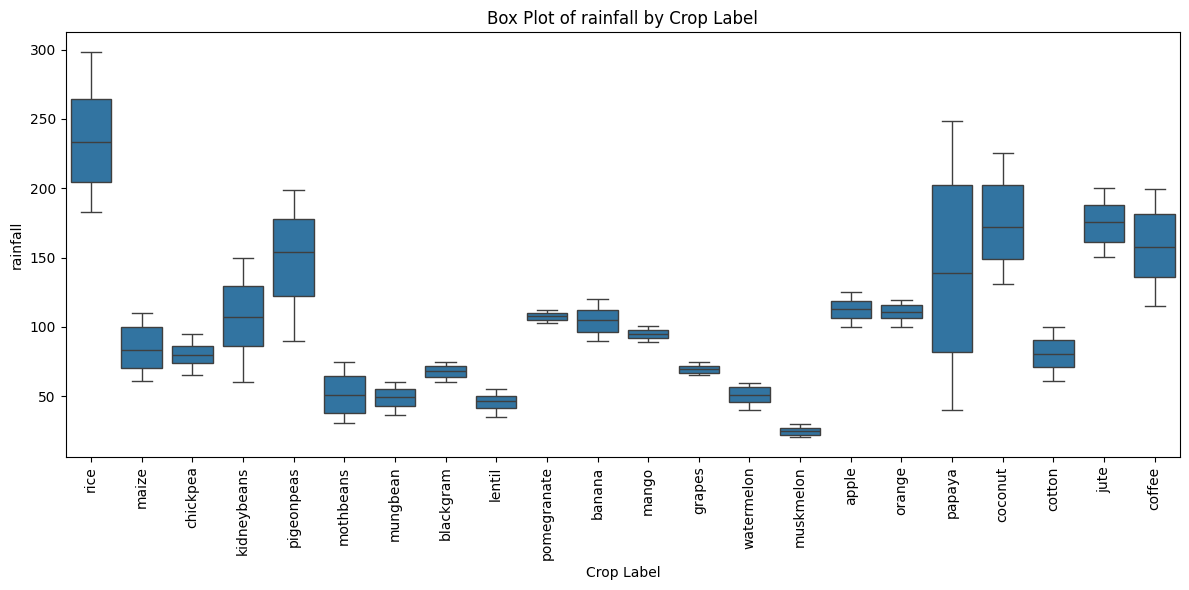

In [ ]:
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='label', y=col)
    plt.title(f'Box Plot of {col} by Crop Label')
    plt.xlabel('Crop Label')
    plt.ylabel(col)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

To Check For Null Values

In [ ]:
df.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

The **label column** in the dataset appears to contain a variety of crops and fruits. They are Fruits, Grains/legumes, Fiber Crops, Beverage Crops.

**Fruits:** The list includes familiar fruits such as mango, watermelon, papaya, banana, muskmelon, orange, grapes, pomegranate, coconut, and apple.

**Grains/Legumes:** You'll find several grains and legumes, including pigeonpeas, chickpea, mothbeans, mungbean, maize (corn), rice, blackgram, kidneybeans, and lentil.

**Fiber Crops:** The list also contains crops primarily grown for fiber, like jute and cotton.

**Beverage Crop:** Additionally, the column lists coffee, which is cultivated for its beans to produce the beverage.

In [ ]:
df['label']=df['label'].map({'pigeonpeas':0,'jute':1,'mothbeans':2,'mango':3,'watermelon':4,
                             'chickpea':5,'cotton':6,'mungbean':7,'coffee':8,'maize':9,
                             'papaya':10,'rice':11,'banana':12,'blackgram':13
                             ,'muskmelon':14,'orange':15,'kidneybeans':16,'grapes':17,'pomegranate':18,
                             'coconut':19,'apple':20,'lentil':21})

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,11
1,85,58,41,21.770462,80.319644,7.038096,226.655537,11
2,60,55,44,23.004459,82.320763,7.840207,263.964248,11
3,74,35,40,26.491096,80.158363,6.980401,242.864034,11
4,78,42,42,20.130175,81.604873,7.628473,262.717340,11
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,8
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,8
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,8
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,8


In [ ]:
X=df.iloc[:,:-1].values
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [ ]:
y=df.iloc[:,-1].values
y

array([11, 11, 11, ...,  8,  8,  8])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65645778],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74167459],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.67421877,
        0.87571039],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55007079],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38428046],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43372112]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=0,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape

((1540, 7), (660, 7))

In [ ]:
y_train.shape,y_test.shape

((1540,), (660,))

# **KNN**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print('accuracy_score :',accuracy_score(y_test,y_pred)*100)
print('precision_score :',precision_score(y_test,y_pred,average='weighted')*100)
print('recall_score :',recall_score(y_test,y_pred,average='weighted')*100)
print('f1_score :',f1_score(y_test,y_pred,average='weighted')*100)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.84      1.00      0.91        31
           2       0.97      0.94      0.96        36
           3       0.97      1.00      0.98        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        34
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        29
           9       1.00      0.96      0.98        27
          10       1.00      0.97      0.99        39
          11       1.00      0.86      0.93        37
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        34
          16       0.96      1.00      0.98        26
          17       1.00    

# **SVC**

In [ ]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))
print('accuracy_score :',accuracy_score(y_test,y_pred)*100)
print('precision_score :',precision_score(y_test,y_pred,average='weighted')*100)
print('recall_score :',recall_score(y_test,y_pred,average='weighted')*100)
print('f1_score :',f1_score(y_test,y_pred,average='weighted')*100)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.91      0.94      0.92        31
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        34
           6       1.00      0.96      0.98        28
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        29
           9       0.96      1.00      0.98        27
          10       1.00      1.00      1.00        39
          11       0.94      0.92      0.93        37
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        34
          16       0.96      1.00      0.98        26
          17       1.00    

# **Decision Tree**

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred=dtc.predict(X_test)
print(classification_report(y_test,y_pred))
print('accuracy_score :',accuracy_score(y_test,y_pred)*100)
print('precision_score :',precision_score(y_test,y_pred,average='weighted')*100)
print('recall_score :',recall_score(y_test,y_pred,average='weighted')*100)
print('f1_score :',f1_score(y_test,y_pred,average='weighted')*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.93      0.87      0.90        31
           2       1.00      0.94      0.97        36
           3       1.00      1.00      1.00        28
           4       1.00      0.96      0.98        25
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        29
           8       1.00      0.93      0.96        29
           9       0.84      1.00      0.92        27
          10       0.95      1.00      0.97        39
          11       0.95      0.95      0.95        37
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        31
          14       0.97      1.00      0.98        30
          15       1.00      1.00      1.00        34
          16       1.00      1.00      1.00        26
          17       1.00    

# **Random Forest**

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print('accuracy_score :',accuracy_score(y_test,y_pred)*100)
print('precision_score :',precision_score(y_test,y_pred,average='weighted')*100)
print('recall_score :',recall_score(y_test,y_pred,average='weighted')*100)
print('f1_score :',f1_score(y_test,y_pred,average='weighted')*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.97      0.97      0.97        31
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        29
           9       0.96      1.00      0.98        27
          10       1.00      1.00      1.00        39
          11       0.97      0.97      0.97        37
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        34
          16       1.00      1.00      1.00        26
          17       1.00    

# **XGB Classifier**

In [ ]:
xg=XGBClassifier(random_state=1)
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=xg.predict(X_test)
print(classification_report(y_test,y_pred))
print('accuracy_score :',accuracy_score(y_test,y_pred)*100)
print('precision_score :',precision_score(y_test,y_pred,average='weighted')*100)
print('recall_score :',recall_score(y_test,y_pred,average='weighted')*100)
print('f1_score :',f1_score(y_test,y_pred,average='weighted')*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      0.90      0.95        31
           2       0.97      0.97      0.97        36
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        34
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        29
           8       0.97      1.00      0.98        29
           9       1.00      0.96      0.98        27
          10       1.00      1.00      1.00        39
          11       0.95      1.00      0.97        37
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        34
          16       1.00      1.00      1.00        26
          17       1.00    

# **Model Performance Comparison:**

In [ ]:
# Function to train a model and return its performance scores
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred) * 100
  precision = precision_score(y_test, y_pred, average='weighted') * 100
  recall = recall_score(y_test, y_pred, average='weighted') * 100
  f1 = f1_score(y_test, y_pred, average='weighted') * 100
  return accuracy, precision, recall, f1

# Creating a dictionary to store performance scores for each model
performance_scores = {}

# Evaluating KNeighborsClassifier
accuracy_knn, precision_knn, recall_knn, f1_knn = train_and_evaluate_model(knn, X_train, y_train, X_test, y_test)
performance_scores['KNeighborsClassifier'] = {'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1 Score': f1_knn}

# Evaluating SVC
accuracy_svc, precision_svc, recall_svc, f1_svc = train_and_evaluate_model(svc, X_train, y_train, X_test, y_test)
performance_scores['SVC'] = {'Accuracy': accuracy_svc, 'Precision': precision_svc, 'Recall': recall_svc, 'F1 Score': f1_svc}

# Evaluating DecisionTreeClassifier
accuracy_dtc, precision_dtc, recall_dtc, f1_dtc = train_and_evaluate_model(dtc, X_train, y_train, X_test, y_test)
performance_scores['DecisionTreeClassifier'] = {'Accuracy': accuracy_dtc, 'Precision': precision_dtc, 'Recall': recall_dtc, 'F1 Score': f1_dtc}

# Evaluating RandomForestClassifier
accuracy_rf, precision_rf, recall_rf, f1_rf = train_and_evaluate_model(rf, X_train, y_train, X_test, y_test)
performance_scores['RandomForestClassifier'] = {'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1 Score': f1_rf}

# Evaluating XGBClassifier
accuracy_xg, precision_xg, recall_xg, f1_xg = train_and_evaluate_model(xg, X_train, y_train, X_test, y_test)
performance_scores['XGBClassifier'] = {'Accuracy': accuracy_xg, 'Precision': precision_xg, 'Recall': recall_xg, 'F1 Score': f1_xg}

# Creating a DataFrame for comparison
performance_df = pd.DataFrame.from_dict(performance_scores, orient='index')

# Printing the performance comparison table
print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                         Accuracy  Precision     Recall   F1 Score
KNeighborsClassifier    98.181818  98.354146  98.181818  98.195381
SVC                     98.787879  98.808784  98.787879  98.788030
DecisionTreeClassifier  98.181818  98.202770  98.181818  98.168379
RandomForestClassifier  99.545455  99.550866  99.545455  99.545590
XGBClassifier           99.090909  99.121459  99.090909  99.083965


# **Cross-Validation**

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {np.mean(scores)*100:.2f}% (+/- {np.std(scores)*100:.2f}%)")

Decision Tree: Mean CV Accuracy = 98.25% (+/- 0.84%)
Random Forest: Mean CV Accuracy = 99.48% (+/- 0.33%)
KNN: Mean CV Accuracy = 97.73% (+/- 0.21%)
SVC: Mean CV Accuracy = 98.05% (+/- 0.98%)
XGBoost: Mean CV Accuracy = 98.83% (+/- 0.60%)


# **Grid Search**

In [ ]:
# Random Forest Grid Search
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
print("Best RF Params:", rf_grid.best_params_)
print("Best RF CV Accuracy:", (rf_grid.best_score_)*100)

# SVC Grid Search
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svc_grid = GridSearchCV(SVC(), svc_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
svc_grid.fit(X_train, y_train)
print("Best SVC Params:", svc_grid.best_params_)
print("Best SVC CV Accuracy:", (svc_grid.best_score_)*100)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best RF CV Accuracy: 99.54545454545453
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVC Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVC CV Accuracy: 98.63636363636363


In [ ]:
# Training the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42)
best_rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluating the model
print("Random Forest Model with Best Parameters Performance on Test Set:")
print(classification_report(y_test, y_pred_best_rf))
print('accuracy_score :', accuracy_score(y_test, y_pred_best_rf) * 100)
print('precision_score :', precision_score(y_test, y_pred_best_rf, average='weighted') * 100)
print('recall_score :', recall_score(y_test, y_pred_best_rf, average='weighted') * 100)
print('f1_score :', f1_score(y_test, y_pred_best_rf, average='weighted') * 100)

Random Forest Model with Best Parameters Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.97      0.97      0.97        31
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        29
           9       0.96      1.00      0.98        27
          10       1.00      1.00      1.00        39
          11       0.97      0.97      0.97        37
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        34
          16   

# **Confusion Matrix**

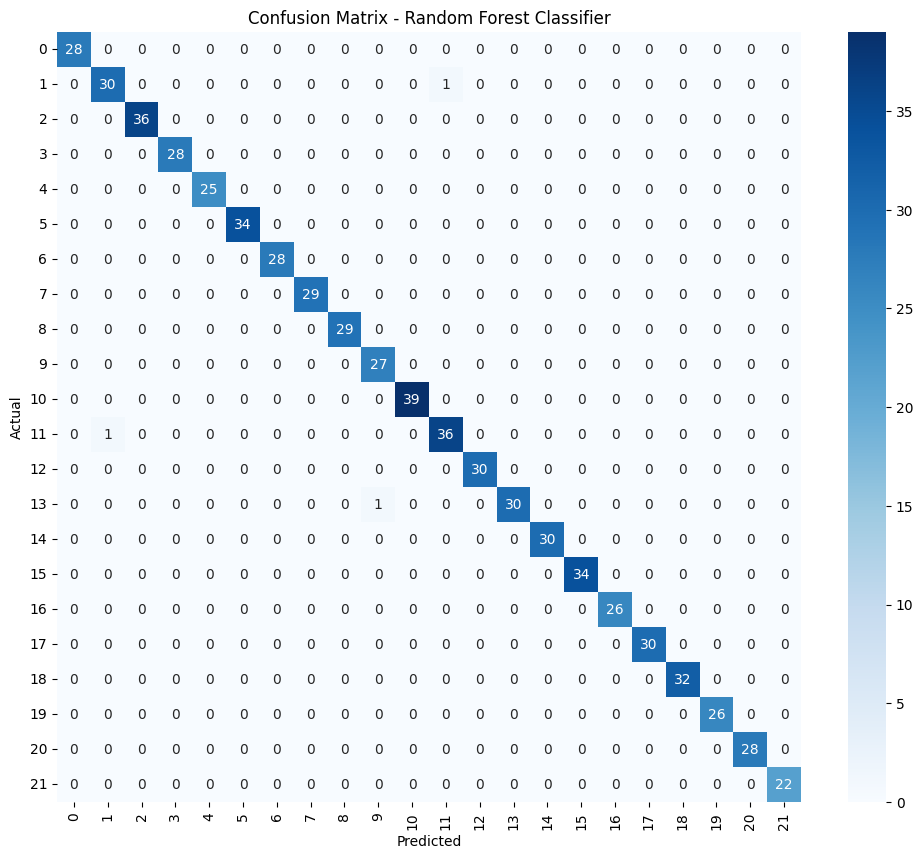

Model Accuracy: 99.55%


In [ ]:
# To Get the unique labels from the original dataframe to use for the confusion matrix
original_labels = sorted(df['label'].unique())

# Generating predictions
y_pred_rf = rf.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=original_labels)

# Ploting confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[list(df['label'].map({
    0: 'Pigeonpeas', 1: 'Jute', 2: 'Mothbeans', 3: 'Mango', 4: 'Watermelon',
    5: 'Chickpea', 6: 'Cotton', 7: 'Mungbean', 8: 'Coffee', 9: 'Maize',
    10: 'Papaya', 11: 'Rice', 12: 'Banana', 13: 'Blackgram', 14: 'Muskmelon',
    15: 'Orange', 16: 'Kidneybeans', 17: 'Grapes', 18: 'Pomegranate',
    19: 'Coconut', 20: 'Apple', 21: 'Lentil'
}).keys())[i] for i in original_labels],
            yticklabels=[list(df['label'].map({
    0: 'Pigeonpeas', 1: 'Jute', 2: 'Mothbeans', 3: 'Mango', 4: 'Watermelon',
    5: 'Chickpea', 6: 'Cotton', 7: 'Mungbean', 8: 'Coffee', 9: 'Maize',
    10: 'Papaya', 11: 'Rice', 12: 'Banana', 13: 'Blackgram', 14: 'Muskmelon',
    15: 'Orange', 16: 'Kidneybeans', 17: 'Grapes', 18: 'Pomegranate',
    19: 'Coconut', 20: 'Apple', 21: 'Lentil'
}).keys())[i] for i in original_labels])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Accuracy
accuracy = np.trace(cm) / np.sum(cm)
print(f"Model Accuracy: {accuracy*100:.2f}%")

# **Saving the Model And Scaler**

In [ ]:
pickle.dump(rf,open('random_forest_model.sav','wb'))

In [ ]:
pickle.dump(scaler,open('minmaxscale.sav','wb'))

# **Streamlit**

In [ ]:
%%writefile app.py
import pickle
import streamlit as st
import numpy as np
from pyngrok import ngrok
from google.colab import userdata


# Loading the saved model and scaler
try:
    with open("random_forest_model.sav", "rb") as f:
        model = pickle.load(f)
except FileNotFoundError:
    st.error("Model file not found. Please ensure 'random_forest_model.sav' exists.")
    model = None

try:
    with open("minmaxscale.sav", "rb") as f:
        scaler = pickle.load(f)
except FileNotFoundError:
    st.error("Scaler file not found. Please ensure 'minmaxscale.sav' exists.")
    scaler = None


# Creating a reverse mapping for the labels
label_mapping = {
    0: 'Pigeonpeas', 1: 'Jute', 2: 'Mothbeans', 3: 'Mango', 4: 'Watermelon',
    5: 'Chickpea', 6: 'Cotton', 7: 'Mungbean', 8: 'Coffee', 9: 'Maize',
    10: 'Papaya', 11: 'Rice', 12: 'Banana', 13: 'Blackgram', 14: 'Muskmelon',
    15: 'Orange', 16: 'Kidneybeans', 17: 'Grapes', 18: 'Pomegranate',
    19: 'Coconut', 20: 'Apple', 21: 'Lentil'
}


st.title("🌾 Crop Recommendation System")


st.image('https://images.unsplash.com/photo-1511735643442-503bb3bd348a?fit=max&fm=jpg&ixid=M3wzNTY3MHwwfDF8YWxsfHx8fHx8fHx8MTY4NzE4MDY5NHw&ixlib=rb-4.0.3&q=75&w=720&utm_medium=referral&utm_source=vocal.media')


# Input fields
N = st.number_input("Nitrogen (N)")
P = st.number_input("Phosphorus (P)")
K = st.number_input("Potassium (K)")
temperature = st.number_input("Temperature (°C)")
humidity = st.number_input("Humidity (%)")
ph = st.number_input("pH")
rainfall = st.number_input("Rainfall (mm)")

if st.button("Predict Crop") and model is not None and scaler is not None:
    data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled_data = scaler.transform(data) # Scale the input data
    prediction = model.predict(scaled_data)[0] # Get the single predicted value

    # Get the crop name from the reverse mapping
    predicted_crop_name = label_mapping.get(prediction, "Unknown Crop")

    st.success(f"✅ Recommended Crop: {predicted_crop_name}")

Overwriting app.py


# **To Stop Any Existing ngrok Tunnels**

In [ ]:
!kill $(pgrep ngrok)

kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


# **User Interface**

In [ ]:
# Set ngrok authtoken
ngrok_auth_token = userdata.get('NGROK_AUTH_TOKEN')
if ngrok_auth_token:
  ngrok.set_auth_token(ngrok_auth_token)
else:
  print("NGROK_AUTH_TOKEN not found in Colab secrets. Please add it to your Colab secrets.")

# Start Streamlit in background
get_ipython().system('streamlit run app.py &> logs.txt &')

# Open tunnel
public_url = ngrok.connect(8501)
print("Streamlit URL:", public_url)

Streamlit URL: NgrokTunnel: "https://0a4566e33bf4.ngrok-free.app" -> "http://localhost:8501"
